# Классификация
В данном уроке мы рассмотрим одну из самых популярных задач машинного обучения - классификацию.

У нас есть некоторые данные. Эти данные следует отнести к заранее определенным классам. 

Например, у нас есть измерения нескольких ирисов. Допустим - это длина лепестка и ширина лепестка. По этим измерениям надо отнести цветок к одному из видов:  Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Это пример носит названия ирисы Фишера. 

Ирис щетинистый (Iris setosa)  | Ирис виргинский (Iris virginica) | Ирис разноцветный (Iris versicolor)
- | - | - 
![alt](img\Irissetosa1.jpg) | ![alt](img\736px-Iris_virginica.jpg) | ![alt](img\800px-Iris_versicolor_3.jpg)


Давайте получим данные и визуализируем их.

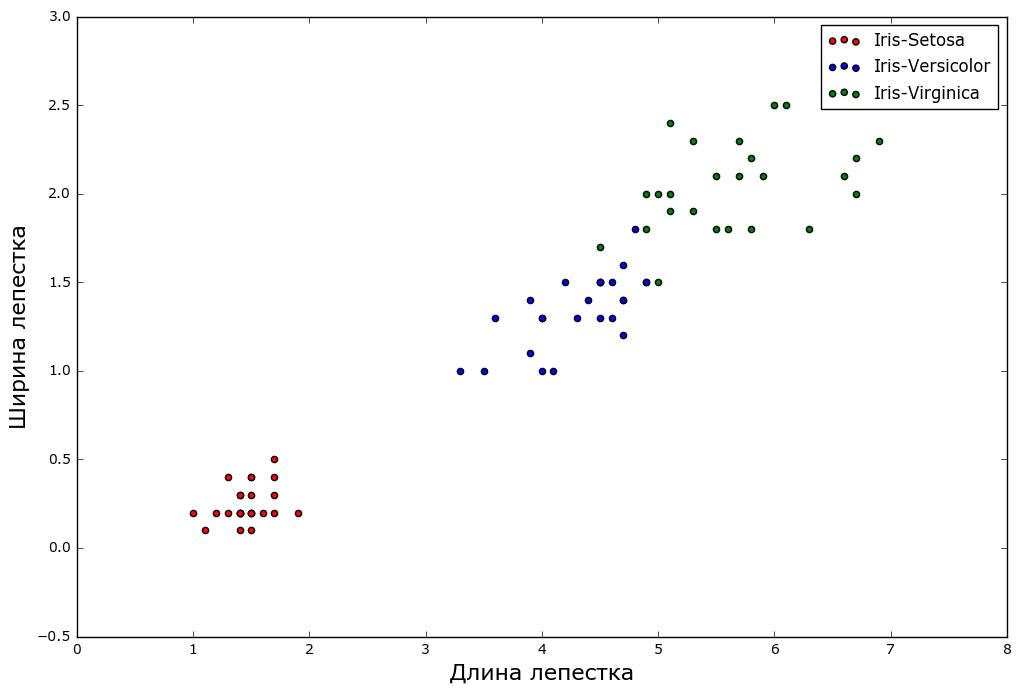

In [1]:
from classification_helper import *
X, y, X_unseen, y_unseen = get_data()
plot_iris(X, y)

Теперь, допустим, у нас есть 3 новых сэмпла данных, которые мы хотим классифицировать (это желтые круг, треугольник и звезда). Попробуем вручную определить к какому классу они относятся. Как вы выбирали решение?

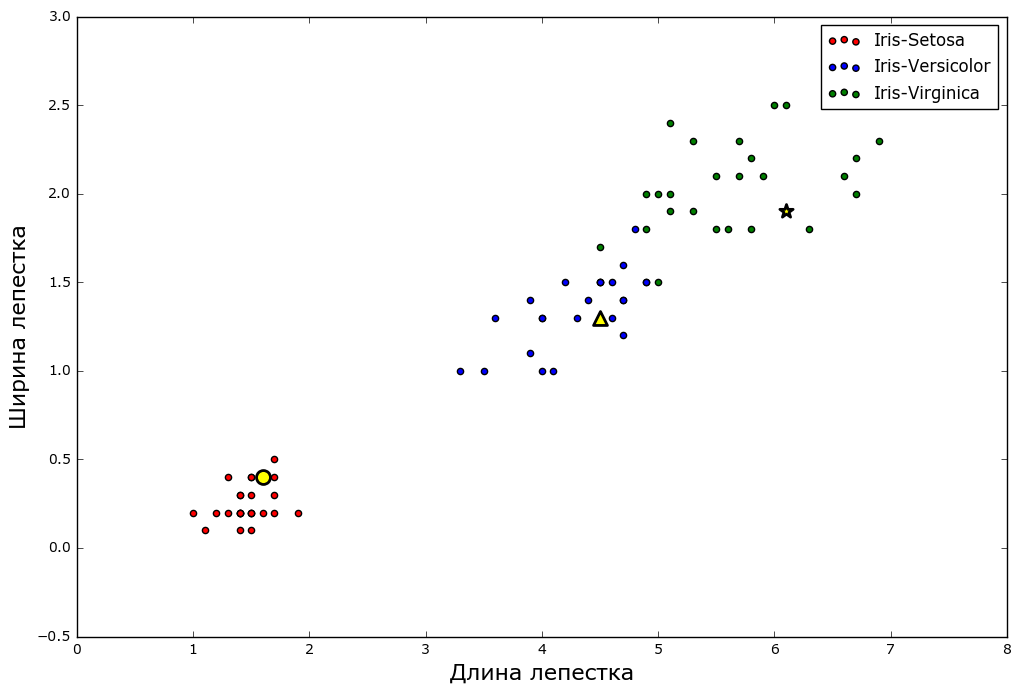

In [2]:
plot_iris(X, y, X_unseen)

# K ближайших соседей (kNN)

Это один из самых простых методов в машинном обучении. Алгоритм можно описать следующим образом:

1. Считаем расстояние от неизвестного сэмпла до данных в обучающем наборе.
2. Находим $k$ ближайших сэмлов.
3. Смотрим к какому классу относятся соседи и на основании большинства выбираем нужный класс. 

#### Плюсы
* Простой в понимании и реализации;
* Не требует обучения;
* На простых данных показывает неплохие результаты.

#### Минусы
* Медленный. Если у нас в тестовом наборе миллион точек, то для каждой неизвестной точки требуется миллион раз рассчитать расстояние;
* Не самый точный;
* Проблема выбора числа соседей;
* Проблема выбора метрики для расстояния;
* Проклятие размерности.

В качестве метрики расстояния обычно выбирается Евклидово расстояние, но есть и более экзотичные примеры (расстояние Хэмминага, например).
$$ a = (x_a, y_a), b= (x_b, y_b)$$
$$euclidian(a, b) = \sqrt{ (x_a - x_b)^2 + (y_a - y_b)^2}$$
$$hemming(a, b) = |(x_a - x_b)| + |(y_a - y_b)|$$
Теперь давайте визуализируем результаты алгоритма. Цветные области означают границы классов. То есть, если точка попадает в красную область, то она классифицируется как Iris-Setosa.


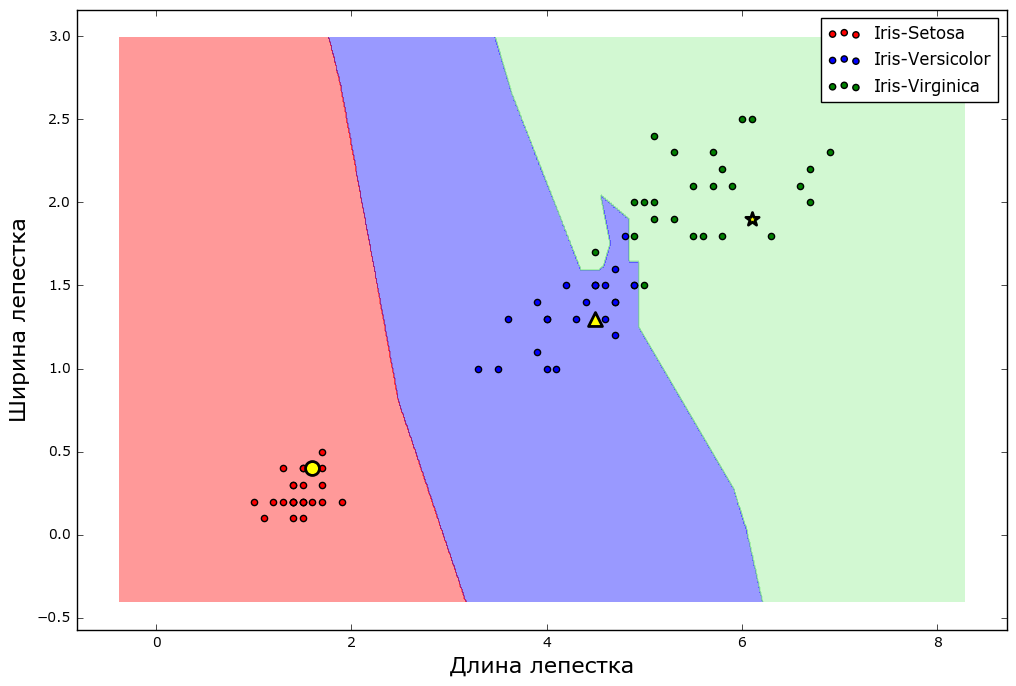

In [3]:
choose_knn(X, y, X_unseen)

Но вот в чем проблема. Давайте теперь визуализируем данные сделав диапазон по осям x и y одинаковым.

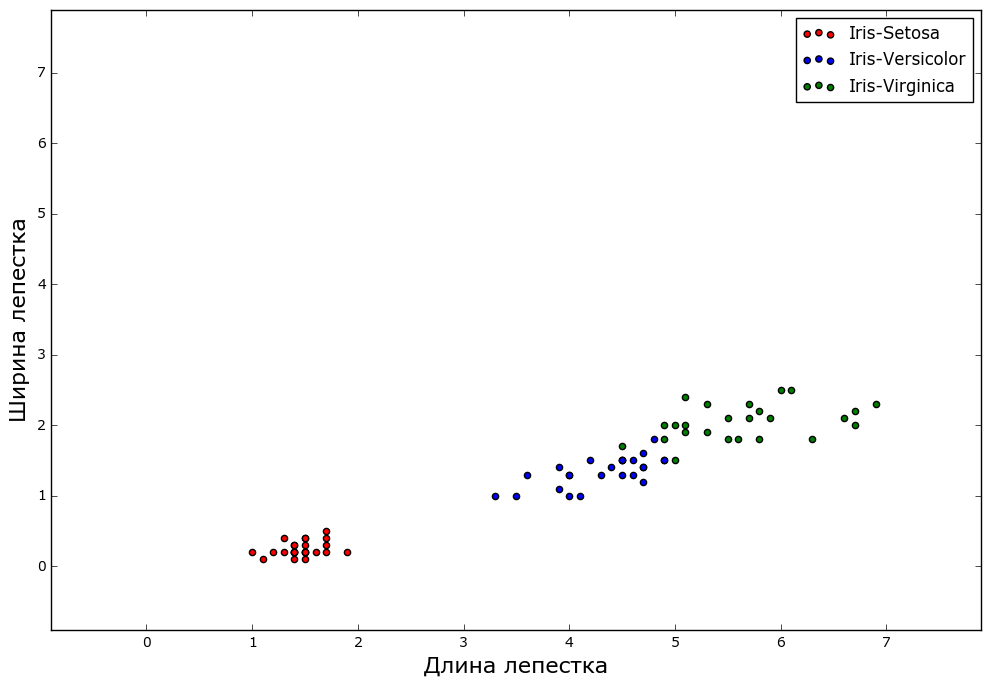

In [4]:
plot_iris(X, y, X_unseen=None, classifier=None, same_range=True)

Диапазон по оси x от 1 до 7, а диапазон по оси y от 0 до 3. И если мы меряем расстояние, то основной вклад в расстояние вносится осью x. Для решения этой проблемы данные нужно приводить к одному и тому же диапазону.
Например, можно использовать нормализацию.

$$X_i = \frac{X_i - min(X)}{max(X) - min(X)}$$

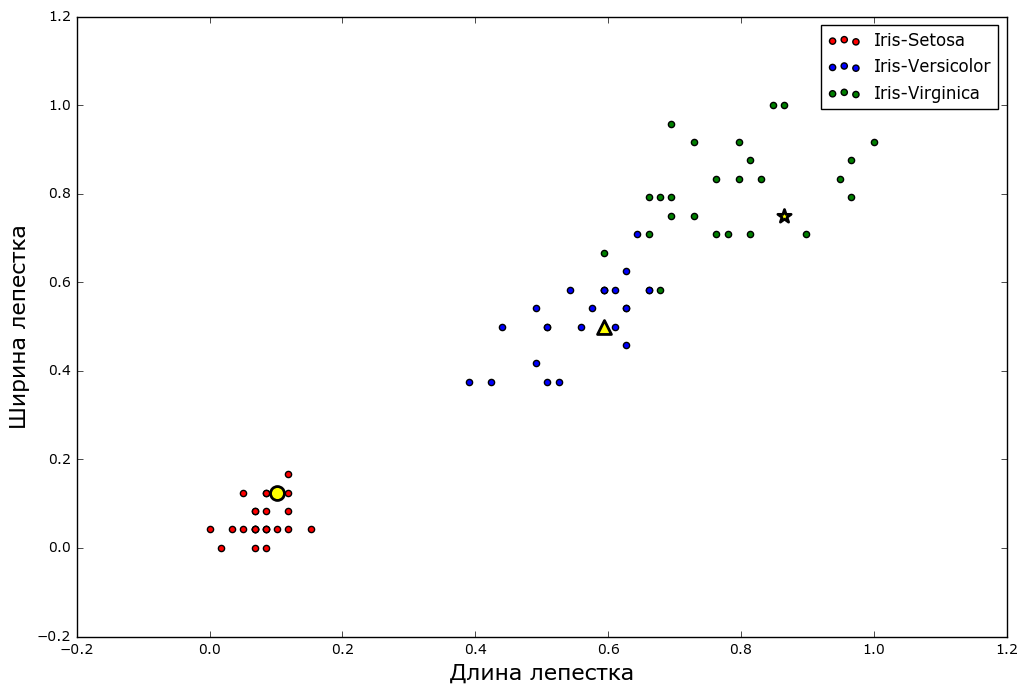

In [5]:
X_norm, X_unseen_norm = normilize_data(X, X_unseen)
plot_iris(X_norm, y, X_unseen_norm)

Теперь посмотрим, как наша модель ведет себя на нормализованных данных.

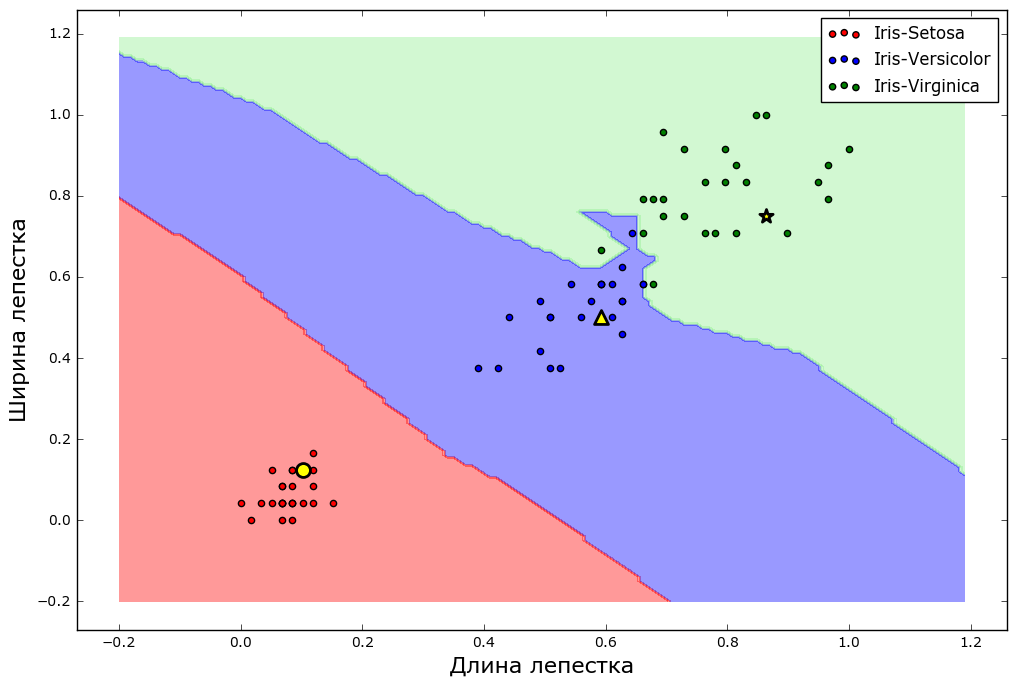

In [6]:
choose_knn(X_norm, y, X_unseen_norm)

# Логистическая регрессия (для одного параметра)

### Бинарная классификация

Логистическая регрессия - это бинарный классификатор. То есть, классификатор, который работает только с двумя классами. 

### Что такое сигмоида

Логистическая регрессия построена на функции, которая называется сигмоида. 
Сигмоида это функция вида $\phi(z) = \frac{1}{1 + e^{-z}}$, где z это результат какой-нибудь функции. Например, $z = \theta_1x + \theta_0$, где $\theta_1$ и $\theta_0$ числа.
Где $e$ - это число Эйлера (числено равно 2.71...)
В следующей ячейке находится график этой функции.


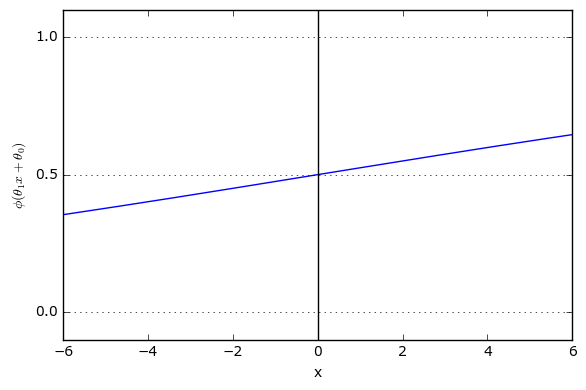

In [7]:
interact_plot_sigmoid()

В следующей ячейке мы посмотрим, как можно классифицировать данные, с помощью этой функции.

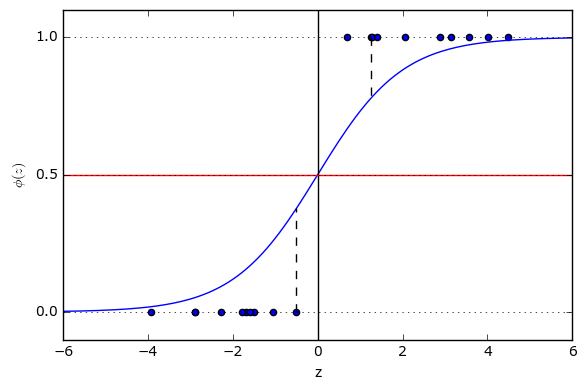

In [8]:
plot_sigmoid(theta1=1, theta0=0, plot_data=True)

### Функция потерь (ошибки) 

Так как значение сигмоида находится между 0 и 1, а сами классы кодируются числом 0 и 1, мы может внести следующую функцию потерь.

$J(\mathbf{\theta}) = \frac{1}{2N} \sum^N_{i=0} (\phi(\theta_1X_i + \theta_0) - y)^2$, где $\theta = \begin{pmatrix}
\theta_0 \\
\theta_1 \\
\end{pmatrix}$

Давайте визуализируем ошибку.


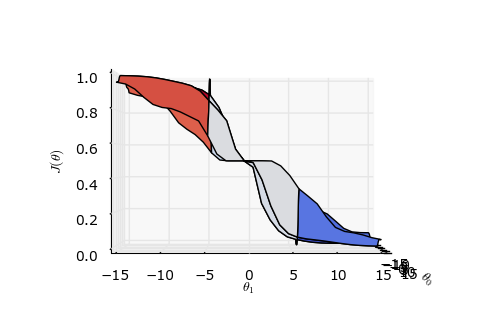

In [10]:
plot_simple_error()

Введем другую функцию потерь.

$J(\mathbf{\theta}) = \frac{1}{2N} \sum^N_{i=0} (-y \log{(\phi(z_i))} - (1-y)\log{(1-\phi(z_i))}$, где $z_i = \theta_1X_i + \theta_0$

$log$ - это логарифм. Он определяется как $log_a(b) = c$, когда $a^c = b$.

Запустим следующую ячейку что бы получше понять новую функцию.

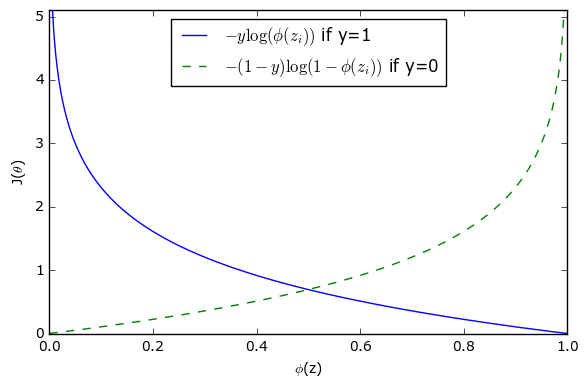

In [11]:
plot_simg_error()

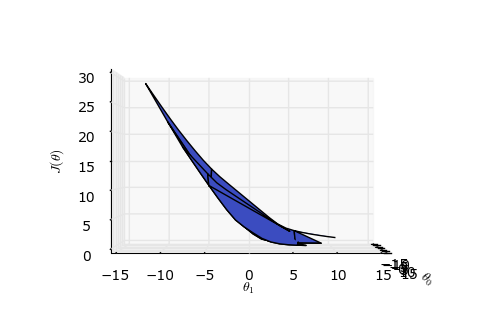

In [12]:
plot_simple_error(loss=J)

# Логистическая регрессия 

Вообще функция логистической регрессии может работать не только когда у нас есть один параметр. Для просторы мы рассмотрим пример с 2-мя параметронами. Данный пример можно легко расширить на большее количество примеров.

И как мы говорили ранее, данные записаны в матрице $X$, размером $NxM$, где строка - это сэмпл данных, а колонка - это параметр. Обычно, для удобства, первая колонка данных - это единицы. Поэтому у нас будет матрица размера Nx3.

Пусть данные записаны в матрице X.

$\begin{equation*}
\mathbf{X} = 
\begin{pmatrix}
1 & X_{0, 1} & X_{0, 2} \\
1 & X_{1, 1} & X_{1, 2} \\
\cdots & \cdots & \cdots \\
1 & X_{N-1, 1} & X_{N-1, 2} \\
\end{pmatrix}
\end{equation*}$

Напоминаю, что $X_{i, j}$ - это элемент матрицы, который находится на i-ой строке и j-том столбце. Или проще говоря это j-ый параметр i-го сэмпла.

И пусть у нас есть вектором значений тета.

$\begin{equation*}
\mathbf{\theta} = 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{pmatrix}
\end{equation*}$ 

Тогда функция логистической регрессии будет следующей:

$\phi(z_i)=\frac{1}{1 + e^{-z_i}}, \\ z_i=\theta_0 + \theta_{1}X_{i, 1} + \theta_{2}X_{i, 2}$


Пусть
$$Z = \begin{pmatrix}
z_0 \\
z_1 \\
\cdots \\
z_{N-2} \\
z_{N-1} \\
\end{pmatrix} $$

Мы можем спокойно найти его перемножив матрицу $X$ и вектор $\theta$.

$$Z = X \cdot \theta = 
\begin{pmatrix}
1 & X_{0, 1} & X_{0, 2}  \\
1 & X_{1, 1} & X_{1, 2}  \\
\cdots & \cdots & \cdots  \\
1 & X_{N-2, 1} & X_{N-2, 2}  \\
1 & X_{N-1, 1} & X_{N-1, 2}  \\
\end{pmatrix} \cdot 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{pmatrix} = 
\begin{pmatrix}
1 \cdot \theta_0 +\theta_1 X_{0, 1} + \theta_2 X_{0, 2} \\
1 \cdot \theta_0 +\theta_1 X_{1, 1} + \theta_2 X_{1, 2} \\
\cdots \\
1 \cdot \theta_0 +\theta_1 X_{N-2, 1} + \theta_2 X_{N-2, 2}  \\
1 \cdot \theta_0 +\theta_1 X_{N-1, 1} + \theta_2 X_{N-1, 2}  \\
\end{pmatrix} =
\begin{pmatrix}
\theta_0 +\theta_1 X_{0, 1} + \theta_2 X_{0, 2} \\
\theta_0 +\theta_1 X_{1, 1} + \theta_2 X_{1, 2} \\
\cdots \\
\theta_0 +\theta_1 X_{N-2, 1} + \theta_2 X_{N-2, 2} \\
\theta_0 +\theta_1 X_{N-1, 1} + \theta_2 X_{N-1, 2} \\
\end{pmatrix}
$$

Таким образом:

$$Z = \begin{pmatrix}
z_0 \\
z_1 \\
\cdots \\
z_{N-2} \\
z_{N-1} \\
\end{pmatrix} =
\begin{pmatrix}
\theta_0 +\theta_1 X_{0, 1} + \theta_2 X_{0, 2} \\
\theta_0 +\theta_1 X_{1, 1} + \theta_2 X_{1, 2} \\
\cdots \\
\theta_0 +\theta_1 X_{N-2, 1} + \theta_2 X_{N-2, 2} \\
\theta_0 +\theta_1 X_{N-1, 1} + \theta_2 X_{N-1, 2} \\
\end{pmatrix}
$$


Функция потери остается такой же.

Для нахождения этих коэффициентов также используем градиентный спуск, как и в линейной регрессии. Но теперь нам необходимо найти производную от функции ошибки для каждого коэффициента. 

Таким образом сам алгоритм градиентного спуска можно описать следующим образом.

* Выбираем случайное значение для $\theta$
* Повторить пока не сойдется:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_{0_{new}} = \theta_0 - \alpha \frac{\delta J(\theta)}{\delta \theta_0} = \theta_0 - \alpha \frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_{1_{new}} = \theta_1 - \alpha \frac{\delta J(\theta)}{\delta \theta_1} = \theta_1 - \alpha \frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)X_{i, 1}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_{2_{new}} = \theta_2 - \alpha \frac{\delta J(\theta)}{\delta \theta_2} = \theta_2 - \alpha \frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)X_{i, 2}$

С помощью матрицы этот алгоритм можно переписать проще. 

$\mathbf{\nabla \theta}$ будем назвать следующий вектор:

$\begin{equation*}
\mathbf{\nabla \theta} = 
\begin{pmatrix}
\frac{\delta J(\theta)}{\delta \theta_0} \\
\frac{\delta J(\theta)}{\delta \theta_1} \\
\frac{\delta J(\theta)}{\delta \theta_2} \\
\end{pmatrix}=
\begin{pmatrix}
\frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i) \\
\frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)X_{i, 1} \\
\frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)X_{i, 2} \\
\end{pmatrix}
\end{equation*}$

Тогда:

$\begin{equation*}
\theta - \alpha \mathbf{\nabla \theta} = 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{pmatrix}-
\alpha  \begin{pmatrix}
\frac{\delta J(\theta)}{\delta \theta_0} \\
\frac{\delta J(\theta)}{\delta \theta_1} \\
\frac{\delta J(\theta)}{\delta \theta_2} \\
\end{pmatrix}=
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{pmatrix}-
\begin{pmatrix}
\alpha  \frac{\delta J(\theta)}{\delta \theta_0} \\
\alpha  \frac{\delta J(\theta)}{\delta \theta_1} \\
\alpha  \frac{\delta J(\theta)}{\delta \theta_2} \\
\end{pmatrix}=
\begin{pmatrix}
\theta_0 - \alpha  \frac{\delta J(\theta)}{\delta \theta_0} \\
\theta_1 - \alpha  \frac{\delta J(\theta)}{\delta \theta_1} \\
\theta_2 - \alpha  \frac{\delta J(\theta)}{\delta \theta_2} \\
\end{pmatrix}=
\begin{pmatrix}
\theta_0 - \alpha  \frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i) \\
\theta_1 - \alpha  \frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)X_{i, 1} \\
\theta_2 - \alpha  \frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)X_{i, 2} \\
\end{pmatrix}
\end{equation*}$

И теперь перепишем наш алгоритм:

* Выбираем случайное значение для $\theta$
* Повторить пока не сойдется:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_{new} = \theta - \alpha \mathbf{\nabla \theta}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta = \theta_{new}$


## Использование бинарного классификатора, для многовариантной  классификаии

Для этого используется метод один против всех. Допустим, у нас есть классы 1, 2, 3.

Тогда для начала тренируется бинарный классификатор для класса 1, остальные классы помечаются как 0. Затем тренирутся второй классификатор для класса 2, остальные классы помечаются как 0. И так далее. 

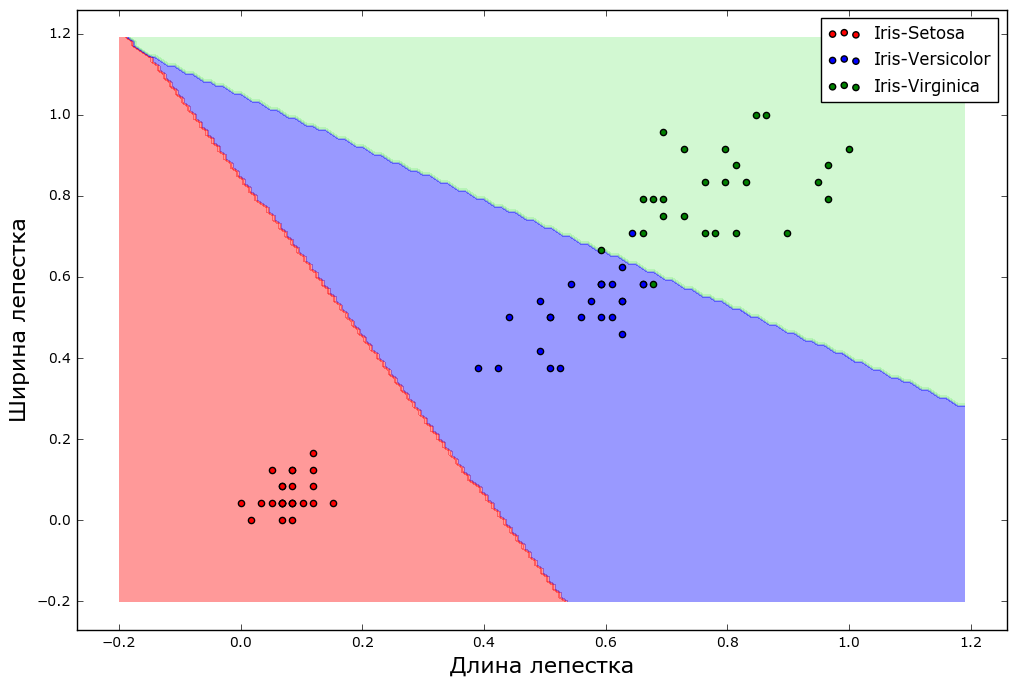

In [13]:
multy_log(X_norm, y)

# Метод опорных векторов

Бинарный классификатор, который старается построить максимальный зазор между данными. Это один из самых популярных методов.
![alt](img\SVM.png)

In [ ]:
SVM(X_norm, y)

# Деревья решений

Деревья решений проще проиллюстрировать, чем объяснить. Само дерево строится в помощью функции прироста информации (алгоритмы ID3 и C4.5).

![alt](img\disition_rus.png)


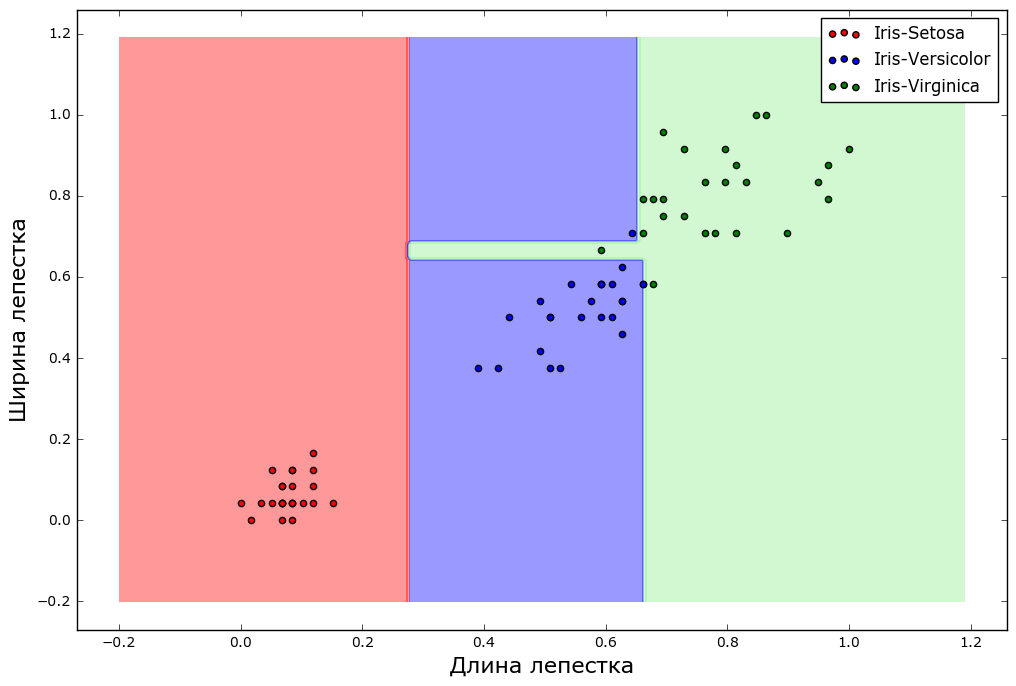

In [14]:
Tree(X_norm, y)

# Задания

В качестве задания мы реализуем логистическую регрессию. В качестве входных данных у нас будет реальные данные опухолей рака груди.

Матрица данных X содержит 3 параметра и 50 сэмплэв. То есть, ее размер 50x3. Нулевая колонка матрицы полностью состоит из единиц. Она нужна нам для удобства. Первая колонка содержит средний радиус опухоли, вторая колонка содержит среднее значение "плавности" опухоли. 

Вектор y размера 50x1. Если Сэмпл равен 1, то опухоль злокачественная, если 0 то доброкачественная.


Нужно выполнить следующие задания

1. Реализовать функцию сигмоиды;
2. Реализовать функцию потерь;
3. Рассчитать градиент;
4. Реализовать градиентный спуск.

Задания следует делать одно за другим.

Для начала запустим следующую ячейку, которая визуализирует наши данные.

In [ ]:
X, y, = get_data_for_task()
simple_plot(X, y)

## Реализовать функцию сигмоиды

На вход функции передается вектор $\mathbf{\theta}$ (размера 3x1), и матрица $\mathbf{X}$ размера Nx3. Функция должна  возвращать вектор-столбец $\mathbf{y}$ размера Nx1. 
   
$\begin{equation*}
\mathbf{\theta} = 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{pmatrix}
\end{equation*}$ 

$\begin{equation*}
\mathbf{X} = 
\begin{pmatrix}
1 & X_{0, 1} & X_{0, 2} \\
1 & X_{1, 1} & X_{1, 2} \\
\cdots & \cdots & \cdots \\
1 & X_{N-1, 1} & X_{N-1, 2} \\
\end{pmatrix}
\end{equation*}$

Подсказка: попробуйте умножить матрицу $X$ на вектор $\theta$

Требуется реализовать функцию $\phi(z_i) = \frac{1}{1+e^{-z_i}}$, где  $z_i=\theta_0 + \theta_{1}X_{i, 1} + \theta_{2}X_{i, 2}$.
Выходной вектор должен иметь следующие значения:

$\begin{equation*}
\mathbf{y} = 
\begin{pmatrix}
\phi(\theta_0 + \theta_1 X_{0, 1} + \theta_2 X_{0, 2}) \\
\phi(\theta_0 + \theta_1 X_{1, 1} + \theta_2 X_{1, 2}) \\
\cdots \\
\phi(\theta_0 + \theta_1 X_{N-1, 1} + \theta_2 X_{N-1, 2}) \\
\end{pmatrix}
\end{equation*}$


In [ ]:
def sigmoid(theta, X):
    # Напоминаю, что код нужно писать в области между звездочками. 
    # Вы можете решить данную задачу с помощью цикла, но 
    # постарайтесь решить ее с помощью векторизации. 
    # Что бы получить вектор экспонент воспользуйтесь np.exp(z)
    # Помни что в X[:, 0] содержаться единицы. 

    y = np.zeros((X.shape[0],)) # создаем переменную y и заполняем ее нулями
    N = X.shape[0]       # получаем размер вектора столбца

    #***********************************************************************

    #***********************************************************************

    return y.reshape(-1)
 
check_sigmoid(sigmoid, X)


## Реализовать функцию потерь 

$J(\mathbf{\theta}) = \frac{1}{2N} \sum^N_{i=0} (-y \log{(\phi(z_i))} - (1-y)\log{(1-\phi(z_i))}$, где $z_i = \theta_0 + \theta_1X_{i,1} + \theta_2 X_{i,2}   $

На вход функции передается вектор $\mathbf{\theta}$ (размера 3x1), матрица $\mathbf{X}$ размера Nx3 и вектор-столбец $\mathbf{y}$ c с реальными значениями размера Nx1. Функция должна возвращать действительное число равное $J(\theta)$.

In [ ]:
def loss_func(theta, X, y):
    # Ты можешь использовать функцию sigmoid из предыдущего задания.
    # Не бойся создавать новые переменные. 
    # Для того, что бы получить логарифм от вектора воспользуйся np.log()
    
    # Результат функции потерь должен быть записан в переменную J

    N = X.shape[0]       # получаем размер вектора столбца
    
    J = 0

    #***********************************************************************
    

    
    #***********************************************************************

    return J
 
check_loss_func(loss_func, X, y)

## Реализовать градиент

Таким образом сам алгоритм градиентного спуска можно описать следующим образом.


На вход функции передается вектор $\mathbf{\theta}$ (размера 3x1), матрица $\mathbf{X}$ размера Nx3 и вектор-столбец $\mathbf{y}$ c с реальными значениями размера Nx1. Функция должна возвращать вектор равный градиенту теты.

$\begin{equation*}
\mathbf{\nabla \theta} = 
\begin{pmatrix}
\frac{\delta J(\theta)}{\delta \theta_0} \\
\frac{\delta J(\theta)}{\delta \theta_1} \\
\frac{\delta J(\theta)}{\delta \theta_2} \\
\end{pmatrix}=
\begin{pmatrix}
\frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i) \\
\frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)X_{i, 1} \\
\frac{1}{N}\sum_{i=0}^{N} (\phi(z_i) - y_i)X_{i, 2} \\
\end{pmatrix}
\end{equation*}$

In [ ]:
def gradient_function(theta, X, y):
    # Ты можешь использовать функцию sigmoid из предыдущего задания. 
    # Не бойся создавать новые переменные. 
    # Помни что ты можешь почлено перемножать вектора. 
    
    # Результат функции потерь должен быть записан в вектор grad
    # Помни что у тебя должно быть 3 значений градиента, для каждой теты.
        
    N = X.shape[0]       # получаем размер вектора столбца
    grad = np.zeros((3, 1))

    #***********************************************************************

    
    #***********************************************************************

    return grad
   
check_gradient_function(gradient_function, X, y)


## Реализовать градиентный спуск

На вход функции передается вектор $\mathbf{\theta_{init}}$ (размера 3x1), матрица $\mathbf{X}$ размера Nx3, вектор-столбец $\mathbf{y}$ c с реальными значениями размера Nx1, параметр $\alpha$ и число $iters$ равный количеству итераций в алгоритме. Функция должна возвращать вектор равный обновленной тете. Также функция возвращает значении функции потерь на каждой итерации.

Для нахождения теты используем градиентный спуск, как и в линейной регрессии. Но теперь нам необходимо найти производную от функции ошибки для каждого коэффициента. 

Таким образом сам алгоритм градиентного спуска можно описать следующим образом.

* Повторить $iters$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_{new} = \theta - \alpha \mathbf{\nabla \theta}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta = \theta_{new}$

Где $\mathbf{\nabla \theta}$ - это градиент найденный с помощью gradient_function.


In [ ]:
def gradient_descent(init_theta, X, y, alpha, iters):
    # Лучше всего использовать функцию gradient_function для 
    # нахождения градиента, чем пересчитывать его еще раз

    # Такде не забудь посчитать и сохранить значение функции потерь 
    # для каждой итерации.

    theta = init_theta
    errors = [0]*iters

    #***********************************************************************
    
    
    

    #***********************************************************************

    return theta, errors
    
check_gradient_descent(gradient_descent, X, y)